## Generation Expansion Planning (GEP) Implicit Formulation

The following sections describe a simple GEP formulation that incorporates uncertainty in renewable energy by using stochastic scenarios for a two-stage problem.

### Indices

| **Name** | **Description**                   |
|----------|-----------------------------------|
| $p$      | time periods                      |
| $g$      | generation technologies           |
| $r(g)$   | subset of renewable techonologies |
| $sc$     | scenarios                         |

### Parameters

| **Name**   | **Domains** | **Description**                                             |
|------------|-------------|-------------------------------------------------------------|
| $pVOLL   $ |             | Value of Lost Load [\$/MWh]                                 |
| $pWeight $ |             | Representative period weight [hours]                        |
| $pInvCost$ | $g$         | Investment cost [\$/MW]                                     |
| $pVarCost$ | $g$         | Variable production cost [\$/MWh]                           |
| $pUnitCap$ | $g$         | Capacity per each invested unit [MW/unit]                   |
| $pRenProf$ | $r,p,sc$    | Renewable profile (e.g., load factor) [p.u.]                |
| $pDemand $ | $p$         | Demand [MW]                                                 |
| $pScProb $ | $sc$        | Scenario probability [p.u.]                                 |

### Variables

| **Name**    | **Domains** | **Description**              |
|-------------|-------------|------------------------------|
| $vTotCost $ |             | Total system cost [\$]       |
| $vInvCost $ |             | Total investment cost [\$]   |
| $vOpeCost $ |             | Total operating cost [\$]    |
| $vGenInv  $ | $g$         | Generation investment [1..N] |
| $vGenProd $ | $g,p,sc$    | Generation production [MW]   |
| $vLossLoad$ | $p,sc$      | Loss of load [MW]            |

### Equations

| **Name**    | **Domains** | **Description**                    |
|-------------|-------------|------------------------------------|
| $eObjFun $  |             | Total system cost [\$]             |
| $eInvCost$  |             | Total investment cost [\$]         |
| $eOpeCost$  |             | Total operating cost [\$]          |
| $eBalance$  | $p,sc$      | Power system balance [MWh]         |
| $eMaxProd$  | $g,p,sc$    | Maximum generation production [MW] |
| $eRenProd$  | $r,p,sc$    | Maximum renewable production [MW]  |

#### *eObjFun*

$$
\displaystyle{\min{vTotCost = vInvCost + vOpeCost}}
$$

#### *eInvCost*

$$
vInvCost = \displaystyle \sum_{g}(pInvCost_{g} \cdot pUnitCap_{g} \cdot vGenInv_{g})
$$

#### *eOpeCost*

$$
vOpeCost = pWeight \cdot {\left(\displaystyle \sum_{sc}pScProb_{sc}\cdot{\left(\sum_{g,p}pVarCost_{g} \cdot vGenProd_{g,p,sc} + \sum_{p,sc}pVOLL \cdot vLossLoad_{p,sc}\right)}\right)}
$$

#### *eBalance*

$$
\displaystyle \sum_{g}vGenProd_{g,p,sc} + vLossLoad_{p,sc} = pDemand_{p} \quad \forall{p,sc}
$$

#### *eMaxProd*

$$
vGenProd_{g,p,sc} \leq pUnitCap_{g} \cdot vGenInv_{g} \quad \forall{g,p,sc}
$$

#### *eRenProd*

$$
vGenProd_{r,p,sc} \leq pRenProf_{r,p,sc} \cdot pUnitCap_{r} \cdot vGenInv_{r} \quad \forall{r,p,sc}
$$

#### *Bounds*

$vGenProd_{g,p,sc}\geq 0 ~ \forall g, p, sc $

$vLossLoad_{p,sc}\geq 0 ~ \forall p, sc $

$vGenInv_{g} \in \mathbb{Z}^{+} ~ \forall g $


In [1]:
# Packages
using JuMP
using HiGHS
using CSV
using DataFrames
using Plots
using StatsPlots

In [2]:
# include the helper functions
include("functions-to-import-data.jl");
include("functions-to-export-data.jl");
include("functions-to-plot-results.jl");

In [3]:
# include the file with the functions for the stochastic GEP model
include("Stochastic-GEP-two-stage.jl");

In [4]:
# Folders names
input_folder = joinpath(@__DIR__, "inputs/two-stage-3sc");
output_folder = joinpath(@__DIR__, "outputs/two-stage-3sc");

In [5]:
# read the data
sets, params = read_two_stage_data(input_folder);

In [6]:
model = create_and_solve_model(sets, params)

Running HiGHS 1.10.0 (git hash: fd8665394e): Copyright (c) 2025 HiGHS under MIT licence terms
MIP  has 360 rows; 364 cols; 900 nonzeros; 4 integer variables (0 binary)
Coefficient ranges:
  Matrix [1e-01, 4e+02]
  Cost   [7e-02, 2e+04]
  Bound  [8e+02, 1e+03]
  RHS    [8e+02, 1e+03]
Presolving model
324 rows, 328 cols, 828 nonzeros  0s
324 rows, 328 cols, 828 nonzeros  0s

Solving MIP model with:
   324 rows
   328 cols (0 binary, 4 integer, 0 implied int., 324 continuous)
   828 nonzeros

Src: B => Branching; C => Central rounding; F => Feasibility pump; H => Heuristic; L => Sub-MIP;
     P => Empty MIP; R => Randomized rounding; S => Solve LP; T => Evaluate node; U => Unbounded;
     z => Trivial zero; l => Trivial lower; u => Trivial upper; p => Trivial point; X => User solution

        Nodes      |    B&B Tree     |            Objective Bounds              |  Dynamic Constraints |       Work      
Src  Proc. InQueue |  Leaves   Expl. | BestBound       BestSol              Gap |   

A JuMP Model
├ solver: HiGHS
├ objective_sense: MIN_SENSE
│ └ objective_function_type: AffExpr
├ num_variables: 364
├ num_constraints: 800
│ ├ AffExpr in MOI.EqualTo{Float64}: 72
│ ├ AffExpr in MOI.LessThan{Float64}: 288
│ ├ VariableRef in MOI.GreaterThan{Float64}: 364
│ ├ VariableRef in MOI.LessThan{Float64}: 72
│ └ VariableRef in MOI.Integer: 4
└ Names registered in the model
  └ :c_balance, :c_max_prod, :v_ens, :v_investment, :v_production

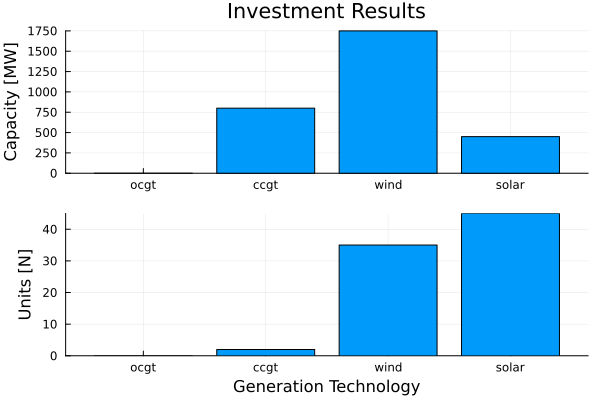

In [7]:
#plotly()
plot_two_stage_investment(model, sets, params)

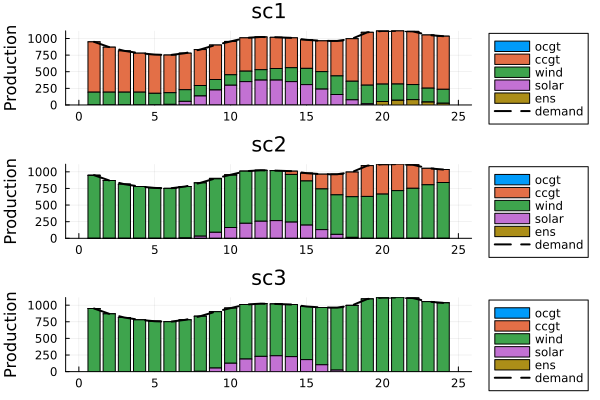

In [8]:
plot_two_stage_production(model, params)

In [9]:
save_two_stage_results_to_csv(output_folder, model)

## Stochastic Measures

In [10]:
# 1. save the solution from the stochastic model
recourse_problem_solution = objective_value(model) # Recourse Problem solution 'here and now'

269238.43825

In [11]:
deterministic_model = Dict()
# 2. save the solution from each deterministic scenario
for sc in sets[:SC]
    # create a copy of the parameters
    params_copy = deepcopy(params)
    # update the scenario probability
    params_copy[:sc_prob] = Dict(scsc == sc ? scsc => 1 : scsc => 0 for scsc in sets[:SC])
    # create and solve the scenario
    deterministic_model[sc] = create_and_solve_model(sets, params_copy)
end

Running HiGHS 1.10.0 (git hash: fd8665394e): Copyright (c) 2025 HiGHS under MIT licence terms
MIP  has 360 rows; 364 cols; 900 nonzeros; 4 integer variables (0 binary)
Coefficient ranges:
  Matrix [1e-01, 4e+02]
  Cost   [4e-01, 2e+04]
  Bound  [8e+02, 1e+03]
  RHS    [8e+02, 1e+03]
Presolving model
324 rows, 328 cols, 828 nonzeros  0s
110 rows, 114 cols, 282 nonzeros  0s

Solving MIP model with:
   110 rows
   114 cols (0 binary, 4 integer, 0 implied int., 110 continuous)
   282 nonzeros

Src: B => Branching; C => Central rounding; F => Feasibility pump; H => Heuristic; L => Sub-MIP;
     P => Empty MIP; R => Randomized rounding; S => Solve LP; T => Evaluate node; U => Unbounded;
     z => Trivial zero; l => Trivial lower; u => Trivial upper; p => Trivial point; X => User solution

        Nodes      |    B&B Tree     |            Objective Bounds              |  Dynamic Constraints |       Work      
Src  Proc. InQueue |  Leaves   Expl. | BestBound       BestSol              Gap |   

In [12]:
# 3. Determine the wait and see solution
wait_and_see_solution = sum(params[:sc_prob][sc] * objective_value(deterministic_model[sc]) for sc in sets[:SC])

213603.0945

In [13]:
# 4. Determine the expected value of perfect information (EVPI) or mean regret
#    Weighted average of the difference between the stochastic solution for each
#    scenario and the perfect information solution in this scenario.
#    Always positive for minimization problems.
expected_value_perfect_information = recourse_problem_solution - wait_and_see_solution

55635.34375

In [14]:
# 5 Create the expected scenario and the expected value of scenarios for the availability profile

# create the copy of the sets and parameters
sets_expected_sc = deepcopy(sets)
params_expected_sc = deepcopy(params)

# update the data
sets_expected_sc[:SC]             = ["expected_sc"]
params_expected_sc[:sc_prob]      = Dict("expected_sc" => 1.0)
params_expected_sc[:availability] = Dict(("expected_sc", g, p) 
                                            => sum(
                                                params[:sc_prob][sc] * get(params_expected_sc[:availability], (sc, g, p), 1)
                                                 for sc in sets[:SC]
                                                    )
                                            for g in sets[:G], p in sets[:P]
                                        )

# create and solve the expected scenario
expected_scenario_model = create_and_solve_model(sets_expected_sc, params_expected_sc)

# store the expected scenario objective function value
expected_value_of_scenarios = objective_value(expected_scenario_model)

Running HiGHS 1.10.0 (git hash: fd8665394e): Copyright (c) 2025 HiGHS under MIT licence terms
MIP  has 120 rows; 124 cols; 302 nonzeros; 4 integer variables (0 binary)
Coefficient ranges:
  Matrix [4e-02, 4e+02]
  Cost   [4e-01, 2e+04]
  Bound  [8e+02, 1e+03]
  RHS    [8e+02, 1e+03]
Presolving model
110 rows, 114 cols, 282 nonzeros  0s
110 rows, 114 cols, 282 nonzeros  0s

Solving MIP model with:
   110 rows
   114 cols (0 binary, 4 integer, 0 implied int., 110 continuous)
   282 nonzeros

Src: B => Branching; C => Central rounding; F => Feasibility pump; H => Heuristic; L => Sub-MIP;
     P => Empty MIP; R => Randomized rounding; S => Solve LP; T => Evaluate node; U => Unbounded;
     z => Trivial zero; l => Trivial lower; u => Trivial upper; p => Trivial point; X => User solution

        Nodes      |    B&B Tree     |            Objective Bounds              |  Dynamic Constraints |       Work      
Src  Proc. InQueue |  Leaves   Expl. | BestBound       BestSol              Gap |   

178646.84624999843

In [15]:
# 6. Save the solution of the expected value
investment_expected_scenario = value.(expected_scenario_model[:v_investment])

1-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, String7["ocgt", "ccgt", "wind", "solar"]
And data, a 4-element Vector{Float64}:
  1.0
 -0.0
 45.0
  0.0

In [16]:
# 7. Solve each deterministic scenario with the expected value solution

deterministic_model_with_expected_solution = Dict()
# save the solution from each deterministic scenario
for sc in sets[:SC]
    # create a copy of the parameters
    params_copy = deepcopy(params)
    # update the scenario probability
    params_copy[:sc_prob] = Dict(scsc == sc ? scsc => 1 : scsc => 0 for scsc in sets[:SC])
    # create and solve the scenario
    deterministic_model_with_expected_solution[sc] =
        create_and_solve_model(sets, params_copy; investments_to_fix = investment_expected_scenario)
end

Running HiGHS 1.10.0 (git hash: fd8665394e): Copyright (c) 2025 HiGHS under MIT licence terms
MIP  has 360 rows; 364 cols; 900 nonzeros; 4 integer variables (0 binary)
Coefficient ranges:
  Matrix [1e-01, 4e+02]
  Cost   [4e-01, 2e+04]
  Bound  [1e+00, 1e+03]
  RHS    [8e+02, 1e+03]
Presolving model
216 rows, 216 cols, 360 nonzeros  0s
0 rows, 0 cols, 0 nonzeros  0s
Presolve: Optimal

Src: B => Branching; C => Central rounding; F => Feasibility pump; H => Heuristic; L => Sub-MIP;
     P => Empty MIP; R => Randomized rounding; S => Solve LP; T => Evaluate node; U => Unbounded;
     z => Trivial zero; l => Trivial lower; u => Trivial upper; p => Trivial point; X => User solution

        Nodes      |    B&B Tree     |            Objective Bounds              |  Dynamic Constraints |       Work      
Src  Proc. InQueue |  Leaves   Expl. | BestBound       BestSol              Gap |   Cuts   InLp Confl. | LpIters     Time

         0       0         0   0.00%   1149102.55      1149102.55   

In [17]:
# 8. Determine the expectation of EV Problem (EEV)
expectation_expected_value_solution = sum(
    params[:sc_prob][sc] * objective_value(deterministic_model_with_expected_solution[sc]) for
    sc in sets[:SC]
)

402282.27325

In [18]:
# 9. Determine the Value of the stochastic solution (VSS) or Expected Value of Including Uncertainty (EVIU)
#    Always positive for minimization problems.
value_stochastic_solution = expectation_expected_value_solution - recourse_problem_solution

133043.83500000002

The following relationship among the stochastic measures is true for minimization problems:

$wait\_and\_see\_solution \leq recourse\_problem\_solution \leq expectation\_expected\_value\_solution$